In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read in the CSV file into a Pandas Dataframe.
ames = pd.read_csv('./data/train.csv')
ames.head()


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [3]:
columns = ames.columns
columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
ames.shape

(1460, 81)

In [5]:
ames.describe().T

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

In [6]:
ames.index

RangeIndex(start=0, stop=1460, step=1)

In [7]:
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [8]:
ames.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [9]:
list(ames.select_dtypes(include=['object']))

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [10]:
# We have 43 non numric features in ames and 38 numric features.

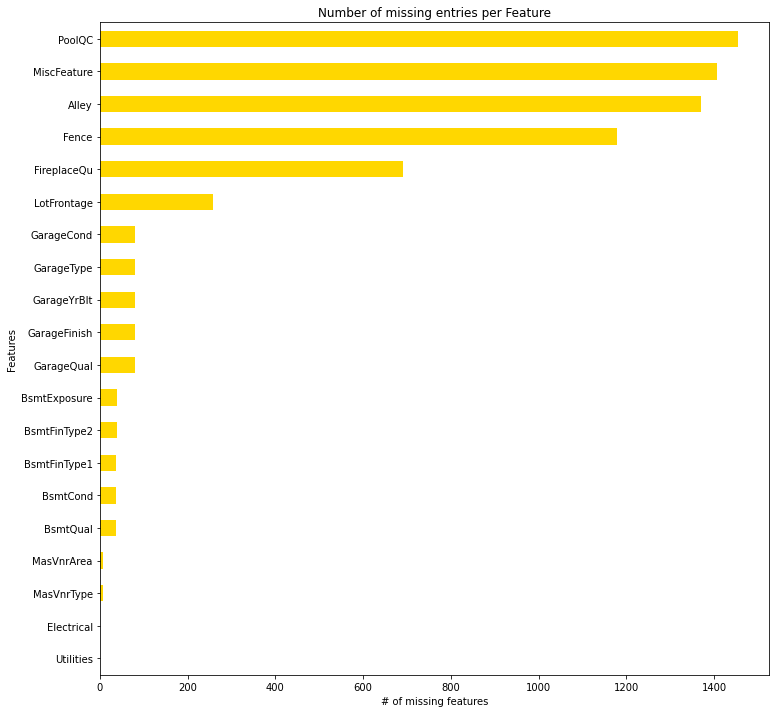

In [11]:
ames.isnull().sum().sort_values(ascending=True).tail(20).plot(kind='barh',figsize=(12,12),color='gold')
plt.xlabel('# of missing features')
plt.ylabel('Features')
plt.title('Number of missing entries per Feature');

In [12]:
# For a better view
missing_valus_total = ames.isnull().sum().sort_values(ascending=False)
Percentage_missing = ((ames.isnull().sum()) / (ames.isnull().count())).sort_values(ascending=False).mul(100)
#Table to view percentage of missing values compared to total missing values
missing_data = pd.concat([missing_valus_total, Percentage_missing], axis=1,keys=['Total Missing', 'Percentage'])
missing_data.head(25)
#This code snippit was adopted mostly from class material

Total Missing  Percentage
PoolQC                 1453   99.520548
MiscFeature            1406   96.301370
Alley                  1369   93.767123
Fence                  1179   80.753425
FireplaceQu             690   47.260274
LotFrontage             259   17.739726
GarageCond               81    5.547945
GarageType               81    5.547945
GarageYrBlt              81    5.547945
GarageFinish             81    5.547945
GarageQual               81    5.547945
BsmtExposure             38    2.602740
BsmtFinType2             38    2.602740
BsmtFinType1             37    2.534247
BsmtCond                 37    2.534247
BsmtQual                 37    2.534247
MasVnrArea                8    0.547945
MasVnrType                8    0.547945
Electrical                1    0.068493
Utilities                 0    0.000000
YearRemodAdd              0    0.000000
MSSubClass                0    0.000000
Foundation                0    0.000000
ExterCond                 0    0.000000
ExterQual                 0    0.000000

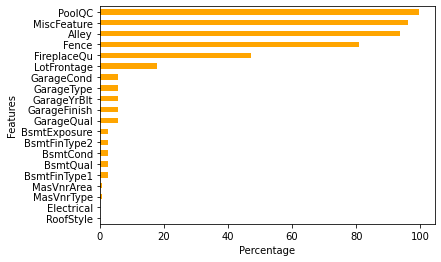

In [13]:
missing_data['Percentage'].sort_values(ascending=True).tail(20).plot(kind='barh',color='orange')
plt.xlabel('Percentage')
plt.ylabel('Features');

In [14]:
#19 of our data's 81 features contain missing values
#PoolQC, MiscFeatures, Alley, Fence, FireplaceQu, LotFrontage etc.. have about > 10% missing values, thus
#we will consider dropping them from our model at a later stage

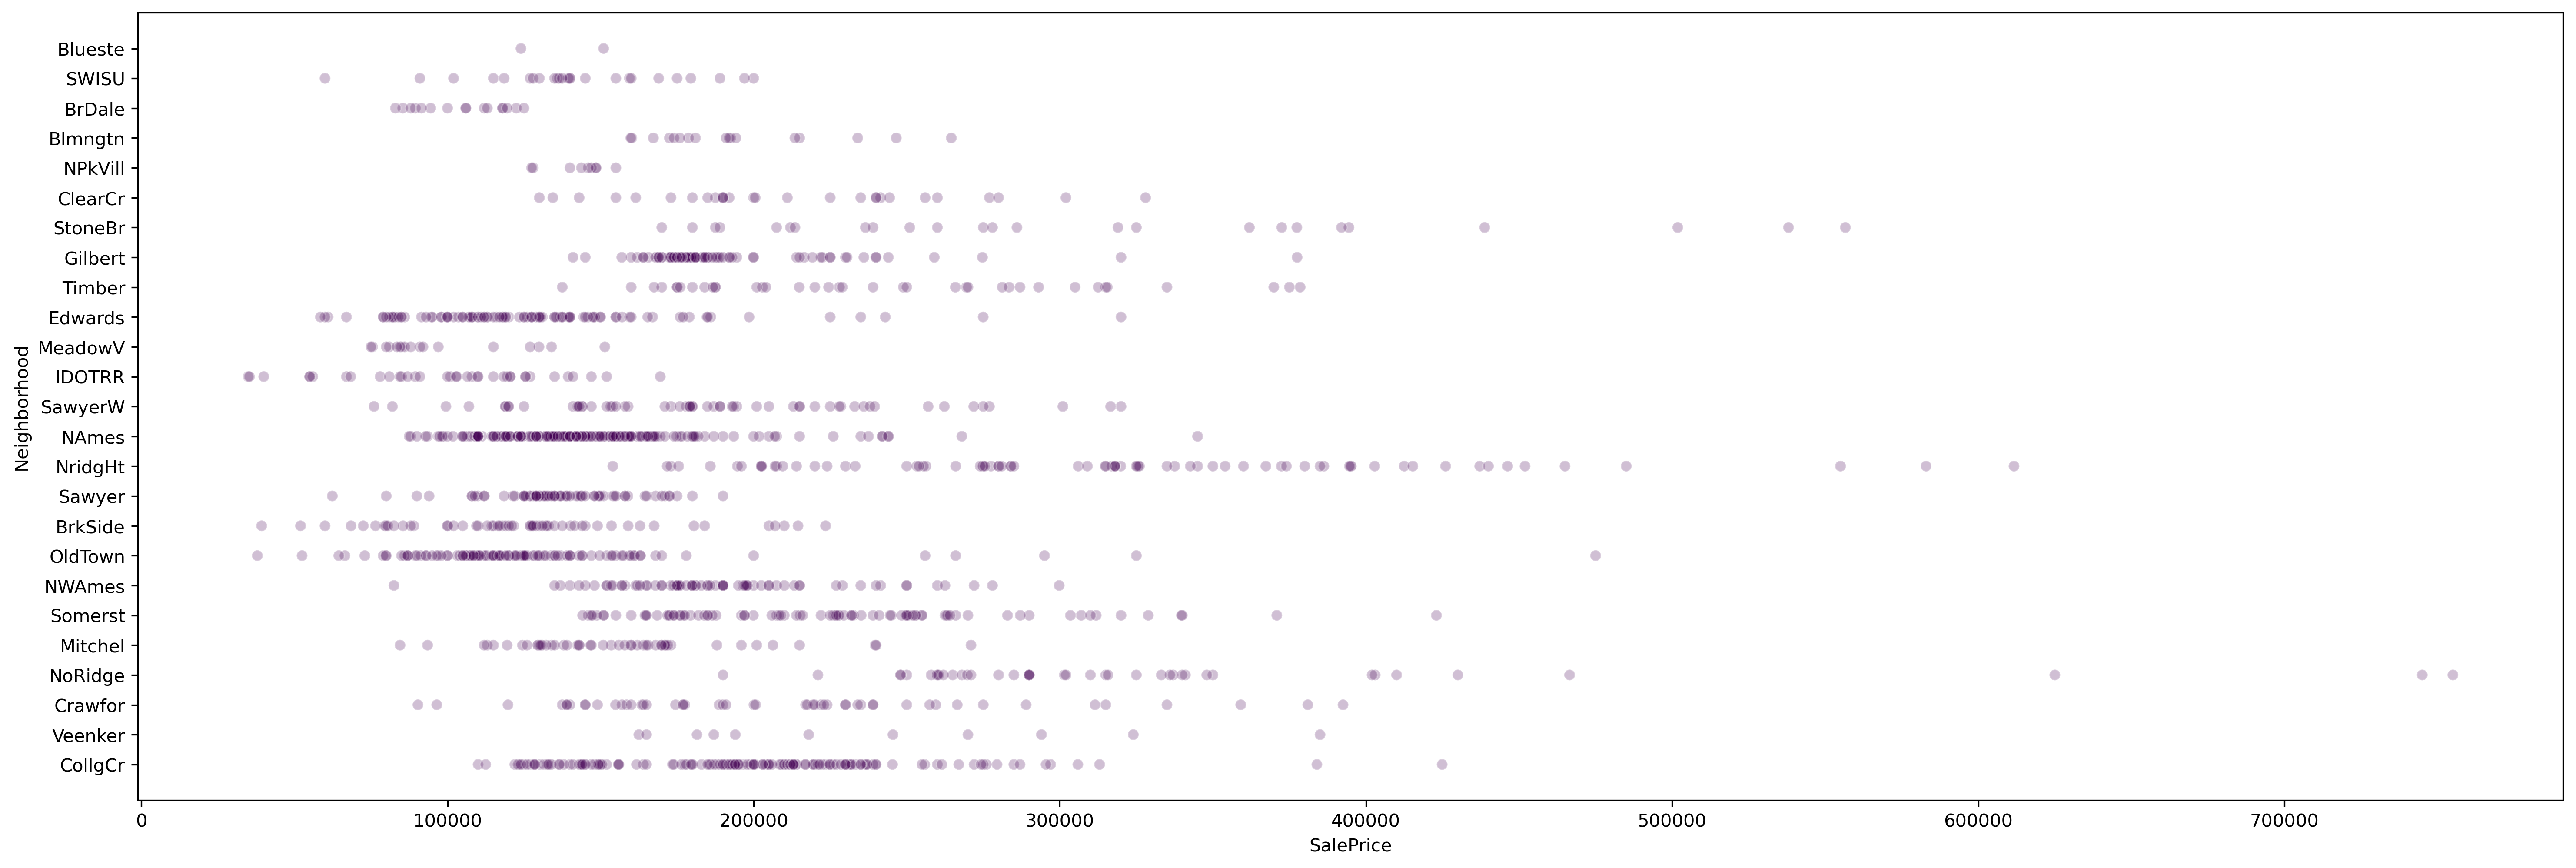

In [15]:
#Plot to show the Sale Prices vs Neighborhoods 
fig = plt.figure(figsize=(24,8),dpi=300)
sns.scatterplot(ames.SalePrice,ames.Neighborhood,hue=True,palette='viridis',alpha=0.25,legend=None);
#Roughly most houses fall between 100k to 250k price range
#A few districts have houses priced at more 250k for example.

In [16]:
#Lets filter houese with prices of above 300k and see which neighborhood they belong too!

In [17]:
houses_above300k = ames[ames['SalePrice'] > 300000]\
[['Neighborhood','SalePrice']].sort_values(by='SalePrice',ascending=False)
houses_above300k.head(10)

Neighborhood  SalePrice
691       NoRidge     755000
1182      NoRidge     745000
1169      NoRidge     625000
898       NridgHt     611657
803       NridgHt     582933
1046      StoneBr     556581
440       NridgHt     555000
769       StoneBr     538000
178       StoneBr     501837
798       NridgHt     485000

In [18]:
houses_above300k.Neighborhood.value_counts()

NridgHt    42
NoRidge    21
StoneBr    11
Somerst    10
Timber      8
Crawfor     6
CollgCr     4
SawyerW     3
Gilbert     2
OldTown     2
Veenker     2
ClearCr     2
NAmes       1
Edwards     1
Name: Neighborhood, dtype: int64

In [19]:
print('We can assume that residents of Northridge Heights, Northridge and Stone Brook are of high income')

We can assume that residents of Northridge Heights, Northridge and Stone Brook are of high income


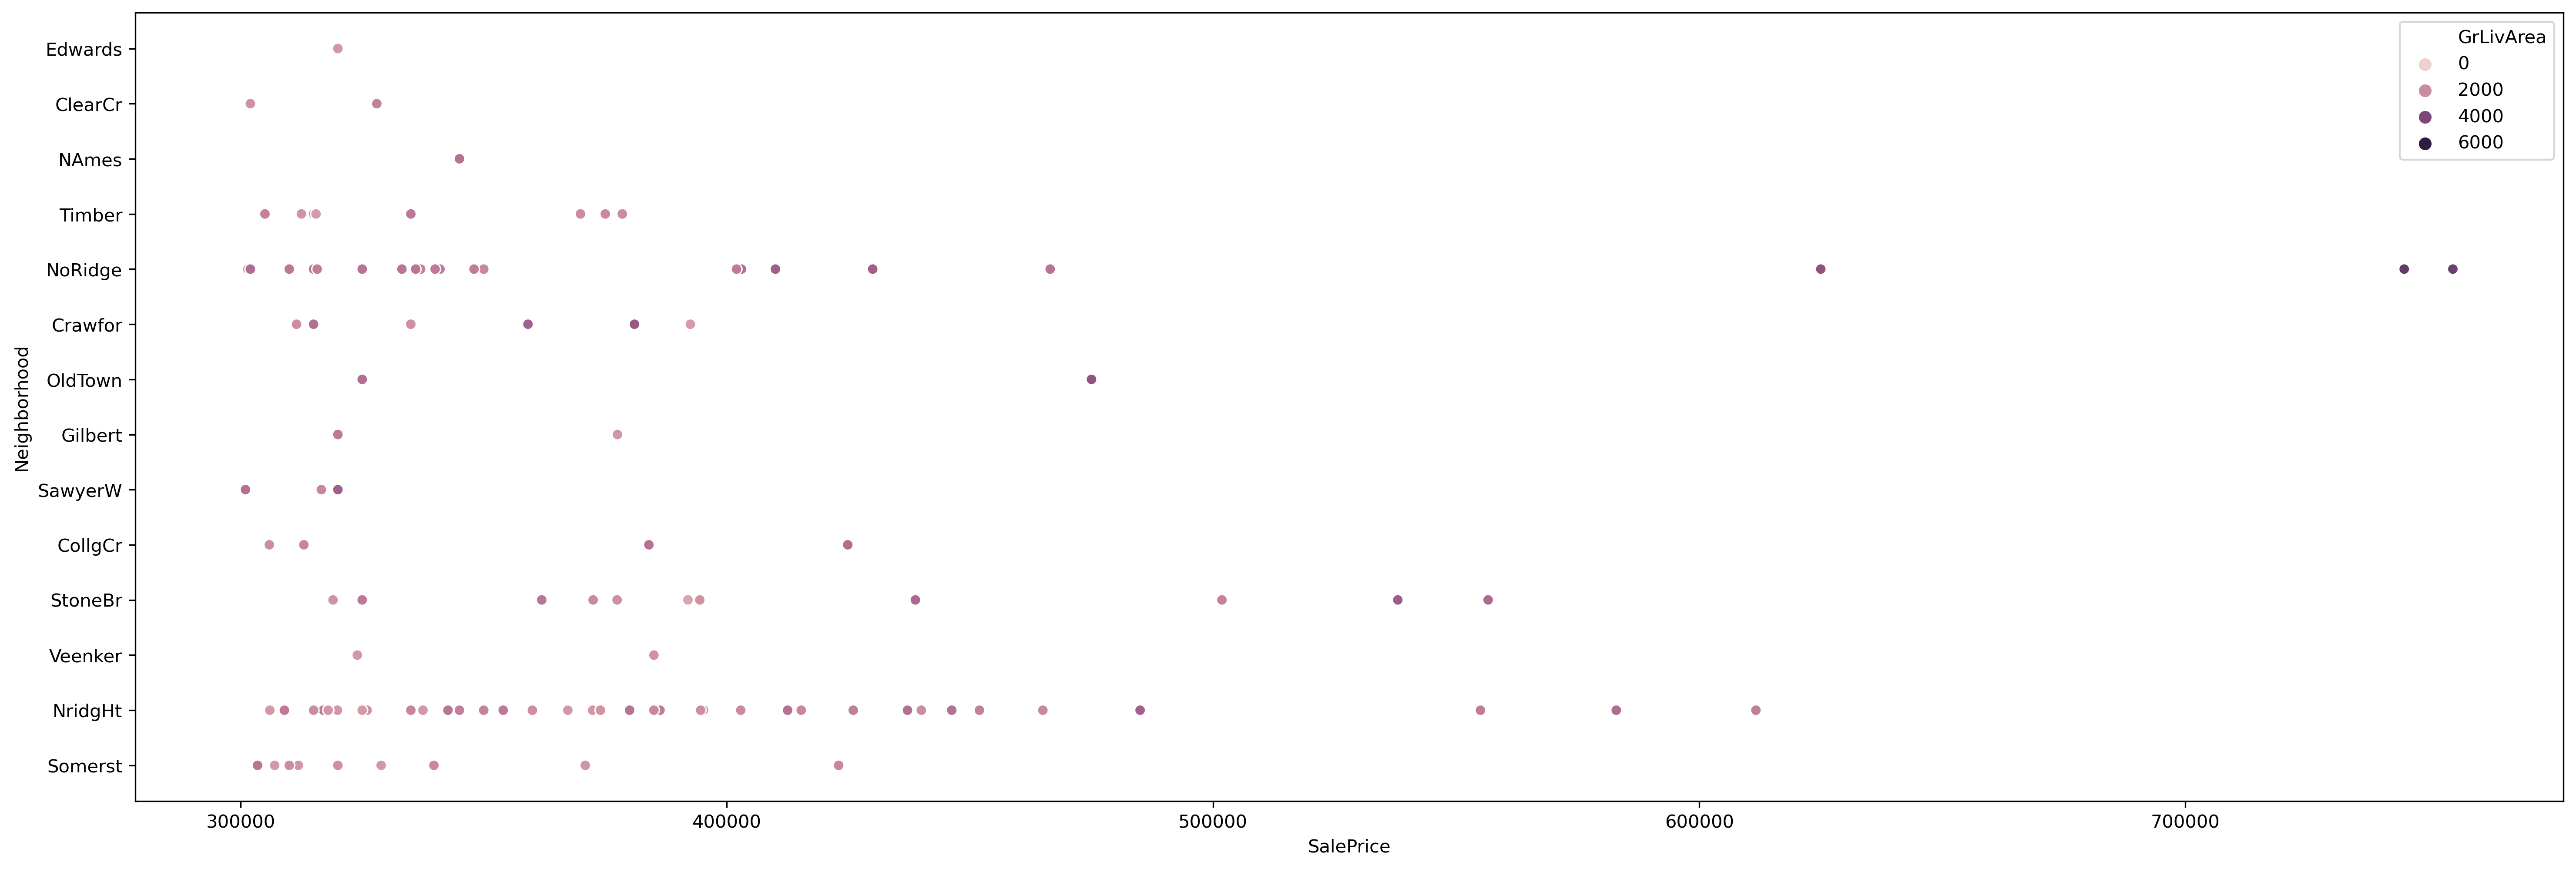

In [20]:
fig = plt.figure(figsize=(24,8),dpi=300)
sns.scatterplot(houses_above300k.SalePrice,houses_above300k.Neighborhood,\
hue=ames.GrLivArea);

#Where houses above 300k price tag are located with their living areas in square feet

In [21]:
#Lets compare to Building type - 1 story family home etc..

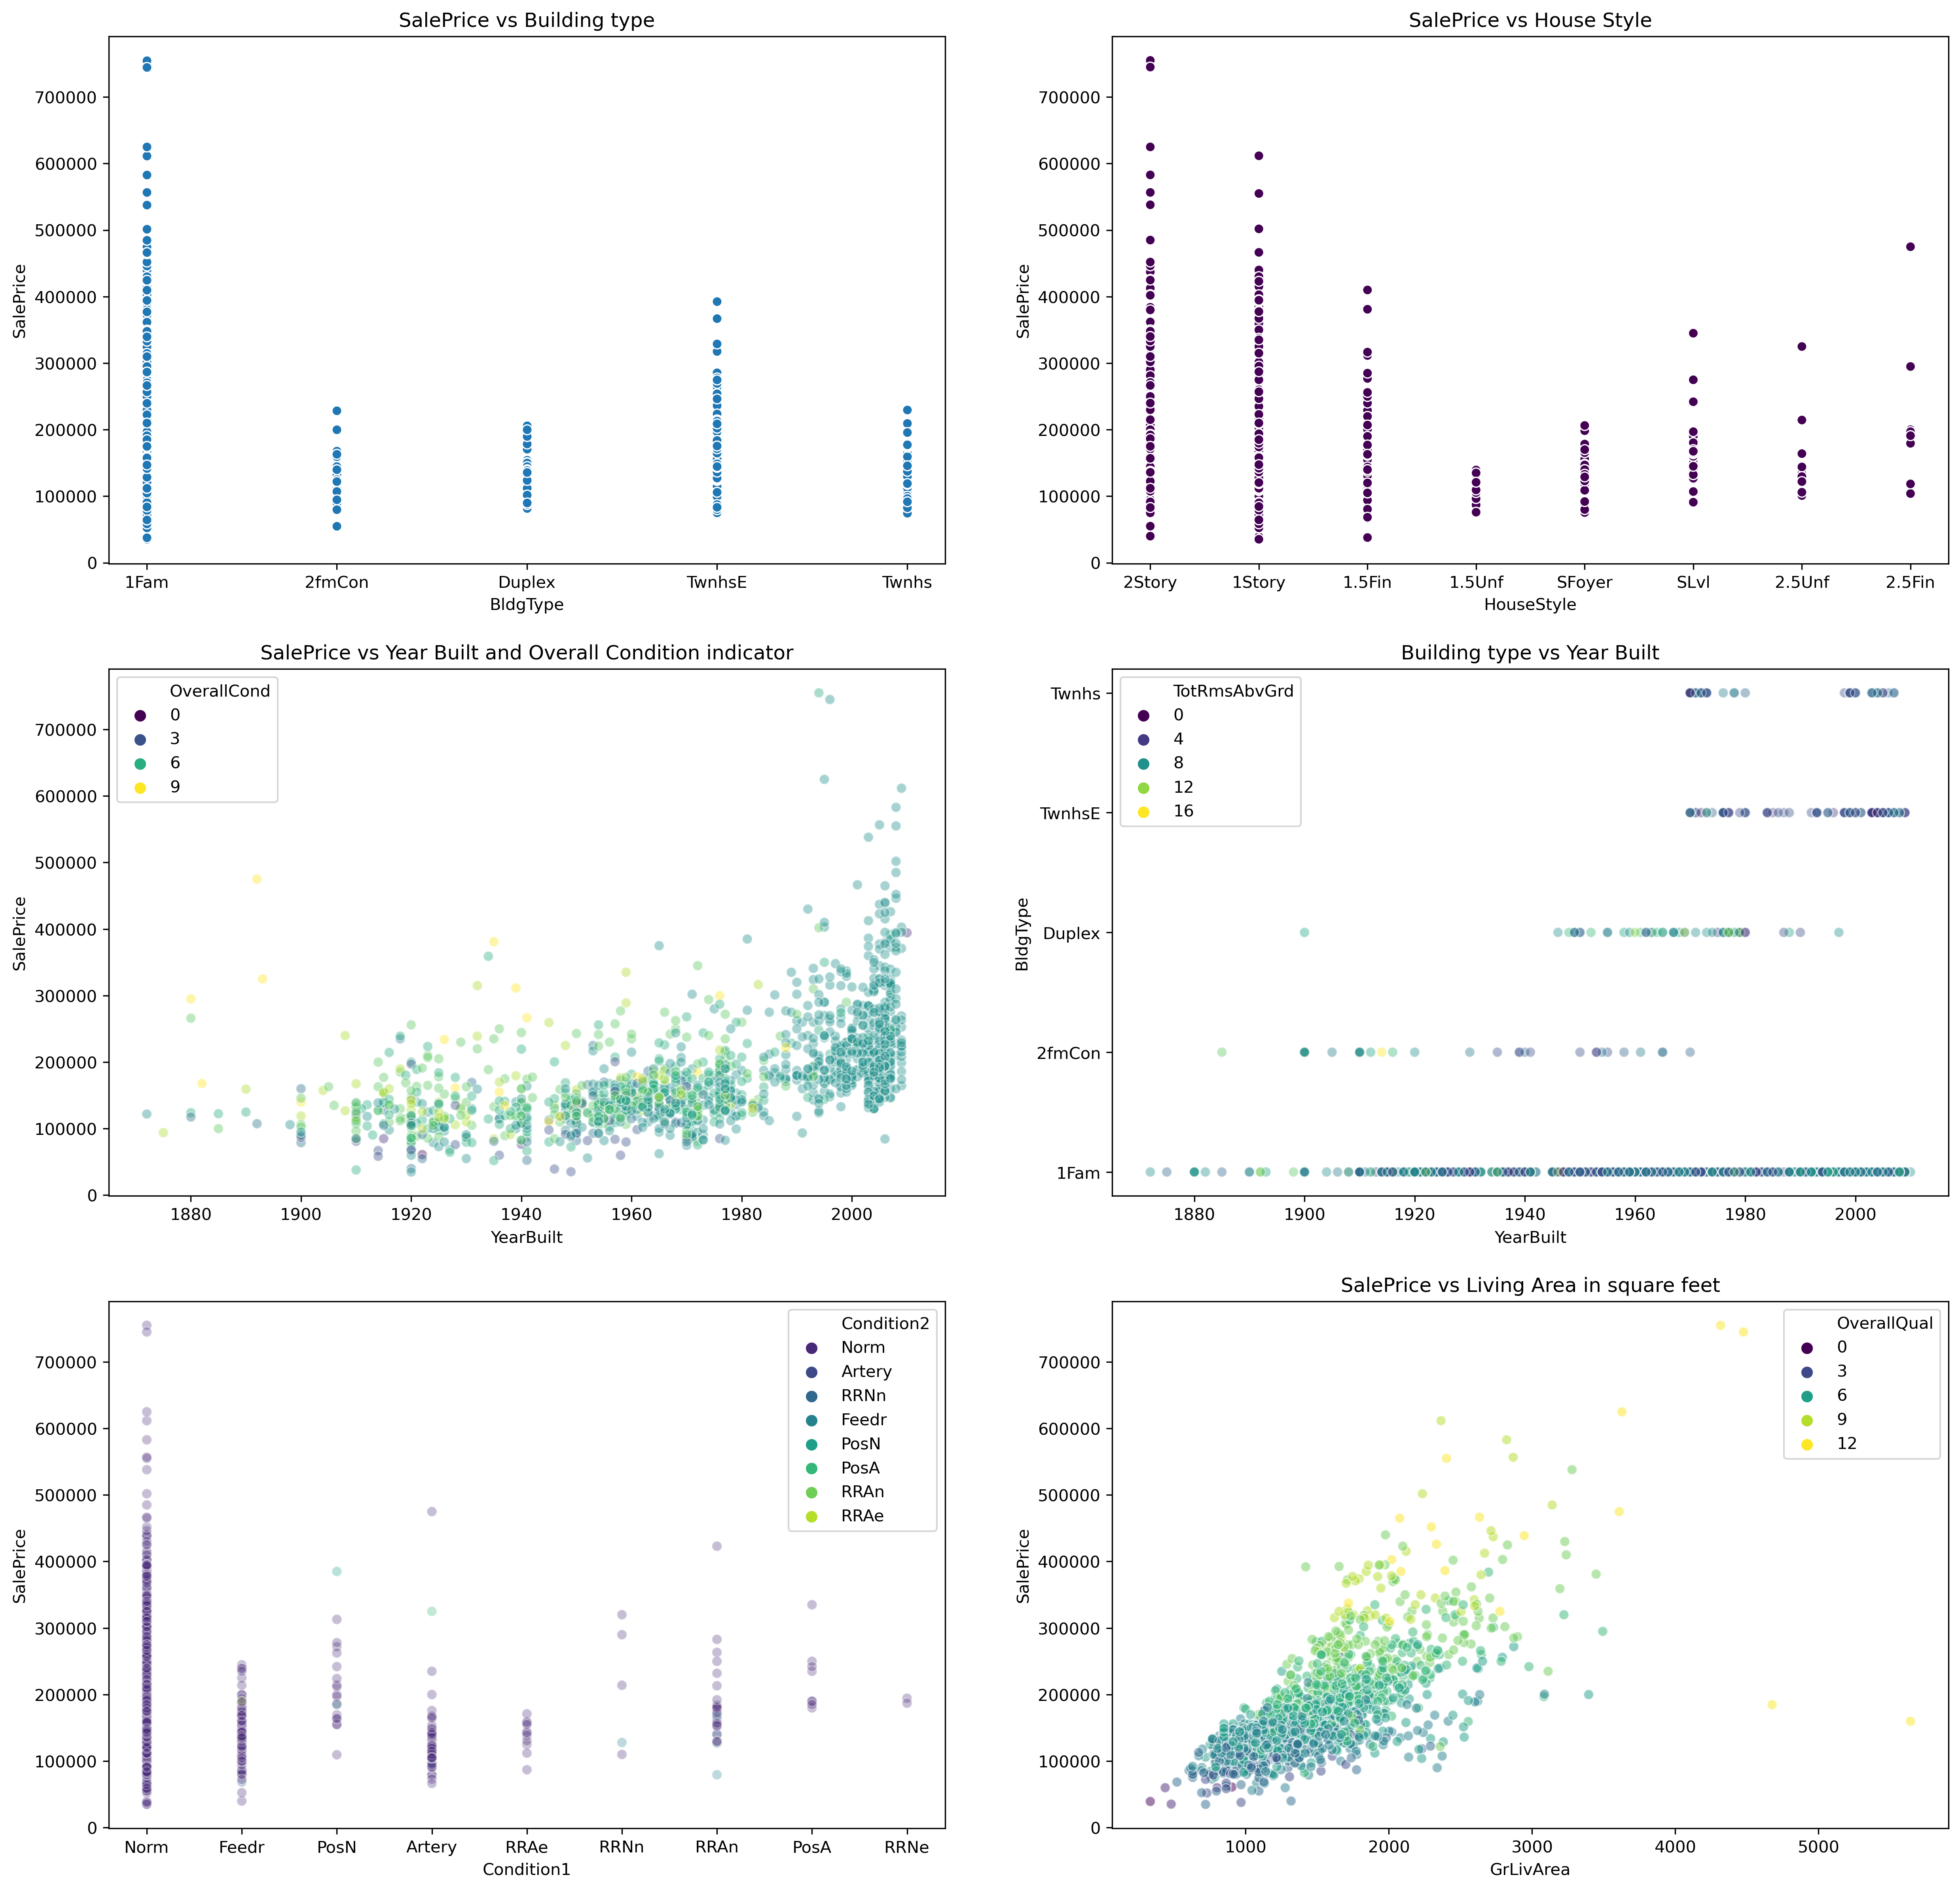

In [22]:
fig = plt.figure(figsize=(20,20), dpi=300)

ax1 = plt.subplot(3, 2, 1)
sns.scatterplot(ames.BldgType,ames.SalePrice,\
palette="viridis");
plt.title('SalePrice vs Building type')
#TotRmsAbvGrd: Total rooms above ground (does not include bathrooms)

ax2 = plt.subplot(3, 2, 2)

sns.scatterplot(ames.HouseStyle,ames.SalePrice,\
hue=True,palette='viridis',legend=None);
plt.title('SalePrice vs House Style')
    
ax3 = plt.subplot(3, 2, 3)

sns.scatterplot(ames.YearBuilt,ames.SalePrice,\
hue=ames.OverallCond,palette='viridis',alpha=0.4);
plt.title('SalePrice vs Year Built and Overall Condition indicator')

ax4 = plt.subplot(3, 2, 4)

sns.scatterplot(ames.YearBuilt,ames.BldgType,\
hue=ames.TotRmsAbvGrd,palette='viridis',alpha=0.4);
plt.title('Building type vs Year Built')

ax5 = plt.subplot(3, 2, 5)

sns.scatterplot(ames.Condition1,ames.SalePrice,\
hue=ames.Condition2,palette='viridis',alpha=0.3);

ax6 = plt.subplot(3, 2, 6)

sns.scatterplot(ames.GrLivArea,ames.SalePrice,\
hue=ames.OverallQual,palette='viridis',alpha=0.5);
plt.title('SalePrice vs Living Area in square feet');
#GrLivArea: Above ground living area in square feet


In [23]:
#Remarks
#ax1: Most houses above the 300k mark are a single family build
#ax3: Most houses are built between 1960s and 2000s
#ax4: most houses built over the years are intended for one family 
#

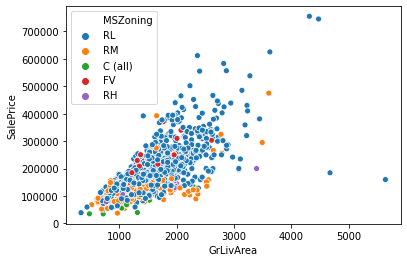

In [24]:
#MSZoning: Identifies the general zoning classification of the sale.
       #A	Agriculture
       #C	Commercial
       #FV	Floating Village Residential
       #I	Industrial
       #RH	Residential High Density
       #RL	Residential Low Density
       #RP	Residential Low Density Park 
       #RM	Residential Medium Density
sns.scatterplot(ames.GrLivArea, ames.SalePrice, hue=ames.MSZoning);
#Most houses in ames fall in 'Residential Low Density' areas

In [25]:
#Most houses above the 300k mark are a single family build

In [26]:
#ames.hist(figsize = (20,20))

In [27]:
#Let's look at some features histograms and box plots

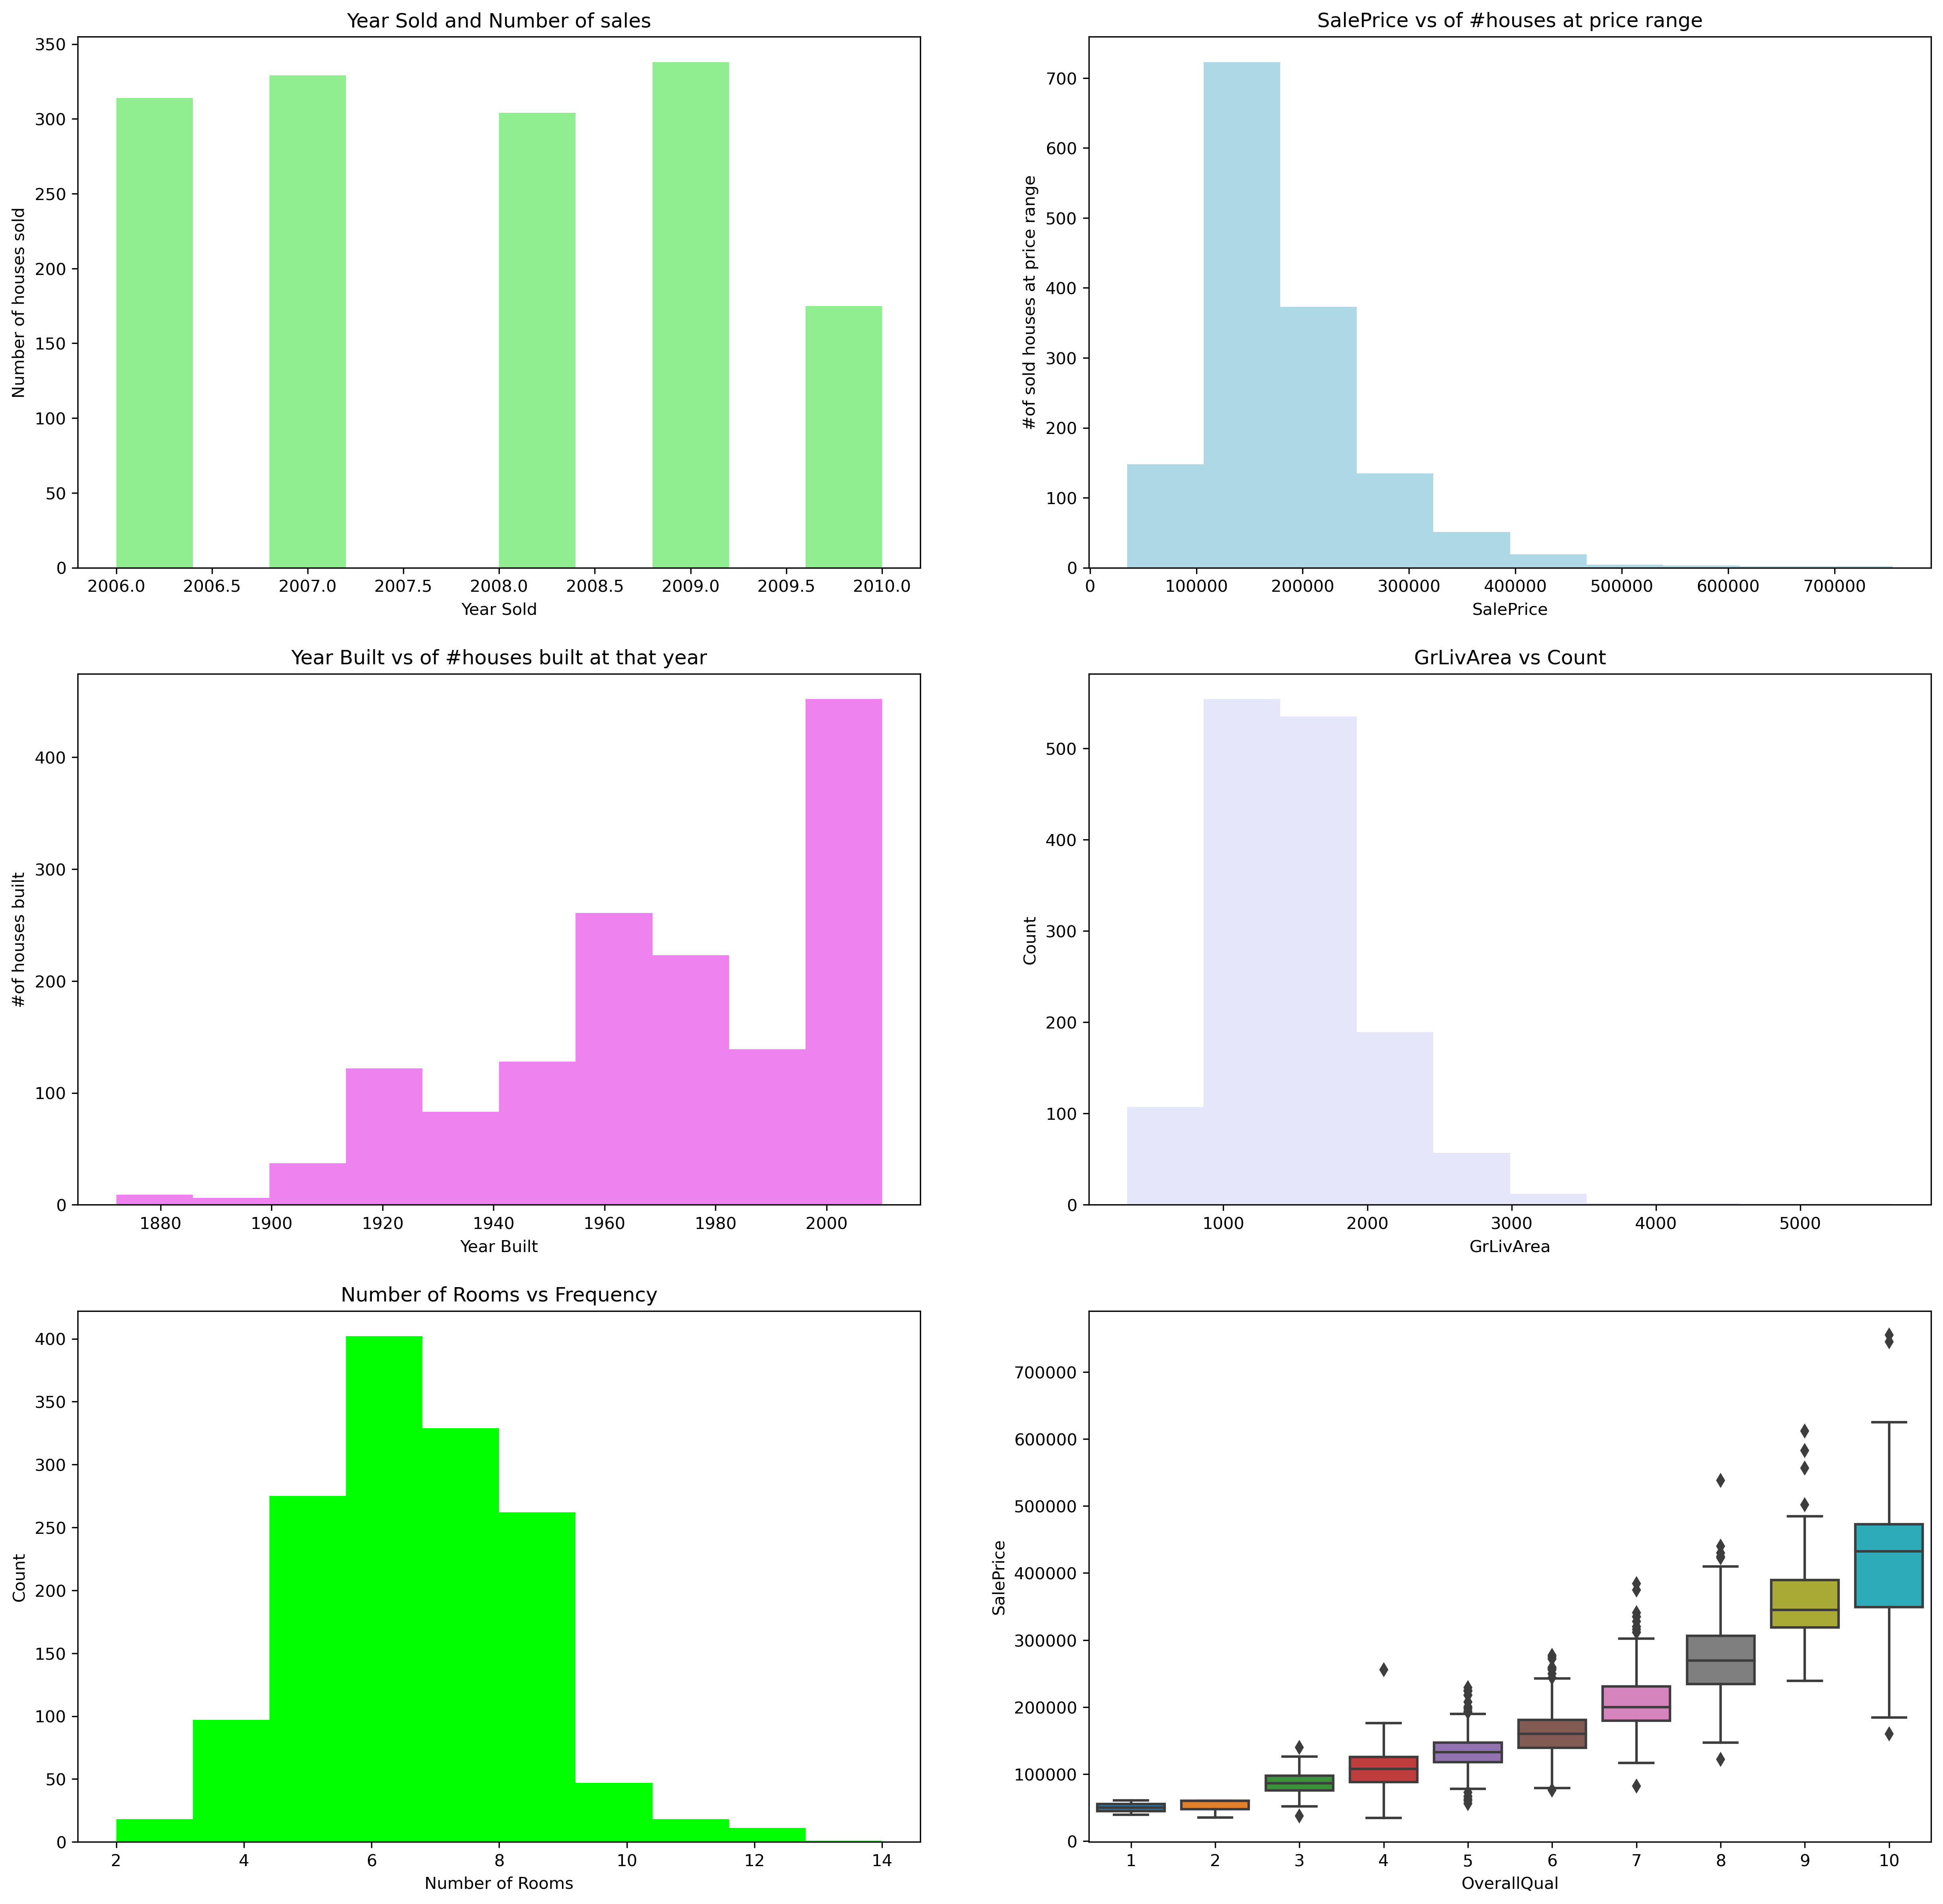

In [28]:
fig = plt.figure(figsize=(20,20), dpi=300)

ax8 = plt.subplot(3, 2, 1)
ames.YrSold.hist(color='lightgreen',grid=False)
plt.xlabel('Year Sold');
plt.ylabel('Number of houses sold');
plt.title('Year Sold and Number of sales')
ax9 = plt.subplot(3, 2, 2)

ames.SalePrice.hist(color='lightblue',grid=False)
plt.xlabel('SalePrice');
plt.ylabel('#of sold houses at price range');
plt.title('SalePrice vs of #houses at price range')    
ax10 = plt.subplot(3, 2, 3)

ames.YearBuilt.hist(color='violet',grid=False)

plt.xlabel('Year Built');
plt.ylabel('#of houses built');
plt.title('Year Built vs of #houses built at that year') 
ax11 = plt.subplot(3, 2, 4)

ames.GrLivArea.hist(color='lavender',grid=False)

plt.xlabel('GrLivArea');
plt.ylabel('Count');
plt.title('GrLivArea vs Count')

ax12 = plt.subplot(3, 2, 5)

ames.TotRmsAbvGrd.hist(color='lime',grid=False)

plt.xlabel('Number of Rooms');
plt.ylabel('Count');
plt.title('Number of Rooms vs Frequency');

#Below box plot adopted from class material
ax17 = plt.subplot(3, 2, 6)
sns.boxplot(data=ames, x='OverallQual', y='SalePrice');

In [29]:
#The histograms above give us a sense of the distributions of some fetures, however,
#We are interested in the distrubtuion of our target varibale 'SalePrice'

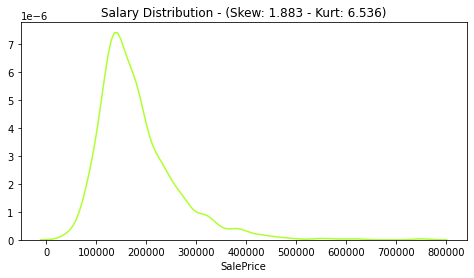

In [30]:
#Including Skew
fig = plt.figure(figsize=(8,4))
plt.title('Salary Distribution - (Skew: {:.3f} - Kurt: {:.3f})'.format(ames.SalePrice.skew(),ames.SalePrice.kurt()))
plt.xlabel('Salary')
sns.distplot(ames.SalePrice,hist=False,color='greenyellow');

In [31]:
#'SalePrice' follows a normal distribution with a positive skew to the right and high kurtosis

In [32]:
#Box Plot of SalePrice to furthur investigate the target

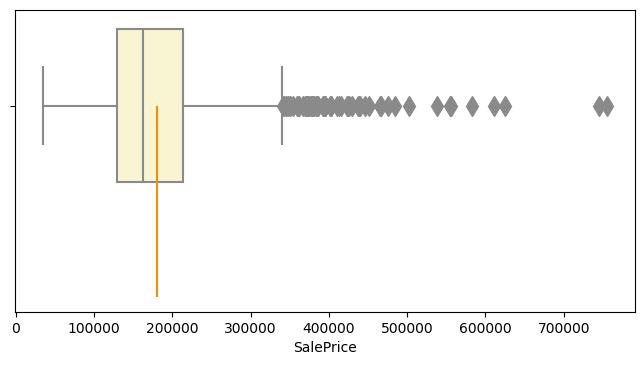

In [33]:
#Code was mainly adopted from class material
fig = plt.figure(figsize=(8,4),dpi = 100)
sns.boxplot(ames.SalePrice,color='lemonchiffon',fliersize =10);

plt.vlines(x=ames.SalePrice.mean(), ymin=0, ymax=1, colors='darkorange');
#sns.boxplot?
 

In [34]:
#Observations:
#The IQR falls between ~130k to ~250k while the mean sits at around 180k
#There is a huge presence of outliers, which probably forced the distrbution to have a positive skew
#When modeling, a carful attention must be paid to outliers
#Let's look at the SalePrice.describe again

In [35]:
ames.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [36]:
col_object_list = list(ames.select_dtypes(include=['object']).columns)
ames.select_dtypes(include=['object']).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [37]:
#For the purpose of modeling, we will engineer ordinal and categorical features 
#In a such a way that would fit our model
#Categorical varibiles --> pd.get_dummies
#Ordinal --> Map to int
#If a feture has certin category or 'order' is very frquent, we will drop it

In [38]:
#Print values counts of each 'object' type columns
for col in col_object_list:
    print(ames[col].value_counts(dropna=False))
    print('\n******************\n')

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

******************

Pave    1454
Grvl       6
Name: Street, dtype: int64

******************

NaN     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

******************

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

******************

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

******************

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

******************

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

******************

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

******************

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber

In [39]:
#Street,Alley,Utilities,Condition2,RoofMatl,Heating,CentralAir,FireplaceQu,PavedDrive,GarageCond,GarageQual,PoolQC
#MiscFeature,SaleType
#The above features will be dropped from our model due to having a high number of missing values or
#a certain attribute of a feature is occuring freqently 

In [40]:
#Data Cleaning and Dealing with missing values

In [41]:
#From earlier

In [42]:
missing_data.head(20)

Total Missing  Percentage
PoolQC                 1453   99.520548
MiscFeature            1406   96.301370
Alley                  1369   93.767123
Fence                  1179   80.753425
FireplaceQu             690   47.260274
LotFrontage             259   17.739726
GarageCond               81    5.547945
GarageType               81    5.547945
GarageYrBlt              81    5.547945
GarageFinish             81    5.547945
GarageQual               81    5.547945
BsmtExposure             38    2.602740
BsmtFinType2             38    2.602740
BsmtFinType1             37    2.534247
BsmtCond                 37    2.534247
BsmtQual                 37    2.534247
MasVnrArea                8    0.547945
MasVnrType                8    0.547945
Electrical                1    0.068493
Utilities                 0    0.000000

In [43]:
col_to_drop_withHigh_NaN_Per = missing_data[missing_data['Percentage'] > 15].index

ames.drop(col_to_drop_withHigh_NaN_Per, axis=1, inplace=True)
#The code above dropped columns where NaNs accumlate >=15% of values

In [44]:
#Dropped columns where NaNs accumlate >=15% of values are:
col_to_drop_withHigh_NaN_Per

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
       'LotFrontage'],
      dtype='object')

In [45]:
#code to view the rest of missing values
missing_valus_less15_Per = ames.isnull().sum().sort_values(ascending=False)
less15_Per_missing = ((ames.isnull().sum()) / (ames.isnull().count())).sort_values(ascending=False).mul(100)

less15_Per_data = pd.concat([missing_valus_less15_Per, less15_Per_missing], axis=1,keys=['Total Missing', 'Percentage'])
less15_Per_data.head(15)


Total Missing  Percentage
GarageType               81    5.547945
GarageYrBlt              81    5.547945
GarageFinish             81    5.547945
GarageCond               81    5.547945
GarageQual               81    5.547945
BsmtExposure             38    2.602740
BsmtFinType2             38    2.602740
BsmtFinType1             37    2.534247
BsmtCond                 37    2.534247
BsmtQual                 37    2.534247
MasVnrType                8    0.547945
MasVnrArea                8    0.547945
Electrical                1    0.068493
RoofMatl                  0    0.000000
RoofStyle                 0    0.000000

In [46]:
ames.shape

(1460, 75)